In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
df['affairs'] = np.where(df['affairs']>0 ,1, 0)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


### Details about dataset
Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

In [7]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


There is no missing values

### Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


In [9]:
## Checking skewness
df.skew()

rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            0.759673
dtype: float64

It seems almost all of them are not skewed

In [10]:
## checking imbalance data set
df[df['affairs']==1].count()

rate_marriage      2053
age                2053
yrs_married        2053
children           2053
religious          2053
educ               2053
occupation         2053
occupation_husb    2053
affairs            2053
dtype: int64

In [11]:
df[df['affairs']==0].count()

rate_marriage      4313
age                4313
yrs_married        4313
children           4313
religious          4313
educ               4313
occupation         4313
occupation_husb    4313
affairs            4313
dtype: int64

It has almost 60 : 40 ratio so, It will not be considered as imbalanced dataset

<AxesSubplot:>

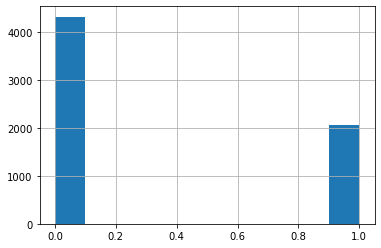

In [12]:
df.affairs.hist()

In [13]:
# Now we will see what is the relation between different features

In [14]:
df.groupby(['affairs']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affairs,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


Here we can see that those womens have affairs have rated their married life less, their age is slightly more, their year of marraige is also more and they have more childrens

<AxesSubplot:>

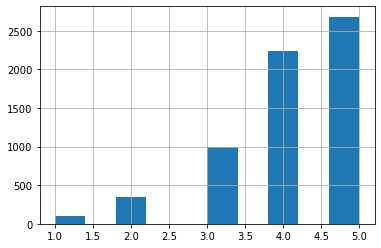

In [15]:
df.rate_marriage.hist()

It depicts most of the girls had rated their marriage as good. As we can see rate_marriage have impact on the affair so, we can say that more womens were not indulged in affairs

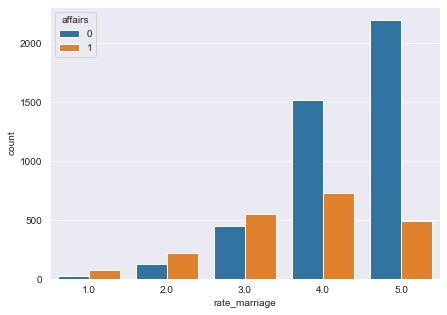

In [16]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid')
sns.countplot(x='rate_marriage',data=df,hue="affairs")
plt.show()

From this vizualization we can see that there is no such exact relation of rate_marraiage with affairs as for 5 rating affair also no. of affairs are high but for 1 rating of marraige affairs are very low

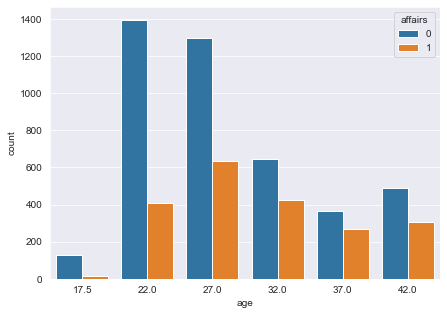

In [17]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(x='age',data=df,hue='affairs')
plt.show()

From this vizualization we can depict that most younger woman have no affairs but the women of older age have more affairs 

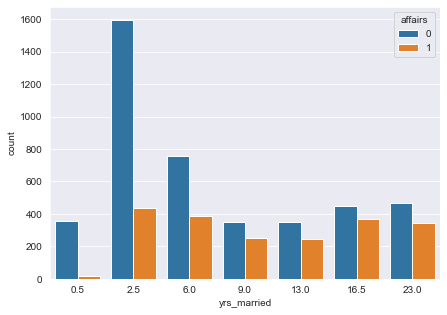

In [18]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(x='yrs_married',data=df,hue='affairs')
plt.show()

From years of marriage we can conclude that womens having less year of marraige have less chance of having an affair than a woman having more nyears of marriage 

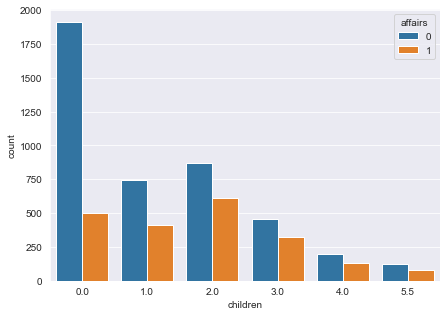

In [19]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(x='children',data=df,hue='affairs')
plt.show()

From this we can conclude that womens having less no. of childern have less chance to be in affair

Rest all the factors are almost same for both the type of womans 

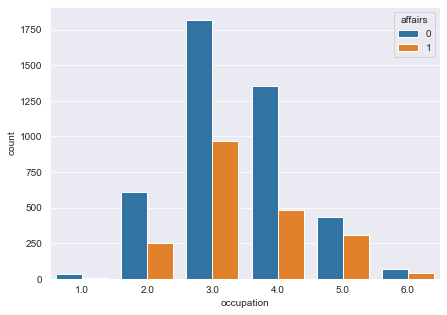

In [20]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.countplot(x='occupation',data=df,hue='affairs')
plt.show()

<AxesSubplot:xlabel='occupation'>

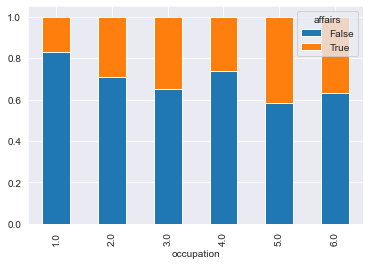

In [21]:
affair_yrs_married = pd.crosstab(df.occupation, df.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='occupation_husb'>

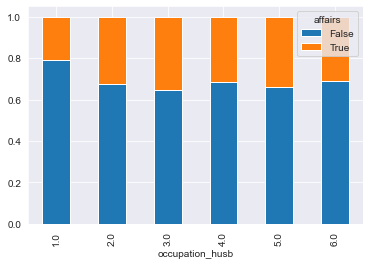

In [22]:
affair_occupation_husb = pd.crosstab(df.occupation_husb, df.affairs.astype(bool))
affair_occupation_husb.div(affair_occupation_husb.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## Model Fit

In [25]:
X = df.iloc[:,0:8]

In [27]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [30]:
Y = df[['affairs']]

In [31]:
Y.head()

,affairs
0,1
1,1
2,1
3,1
4,1


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4456, 8)
(4456, 1)
(1910, 8)
(1910, 1)


In [41]:
ls = LogisticRegression()

In [42]:
ls.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [43]:
## Accuracy of training data
ls.score(x_train,y_train)

0.7237432675044884

In [44]:
## Acuracy of test data 
ls.score(x_test,y_test)

0.731413612565445

Here accuracy for both the training and test data is almost same so, model is not overfit

In [49]:
## Checking prediction for training data
y_prediction_train = ls.predict(x_train)
print(y_prediction_train)

[0 0 0 ... 0 0 0]


In [50]:
y_prediction_prob_train = ls.predict_proba(x_train)
print(y_prediction_prob_train)

[[0.59916245 0.40083755]
 [0.83894041 0.16105959]
 [0.87929043 0.12070957]
 ...
 [0.86367621 0.13632379]
 [0.83585221 0.16414779]
 [0.62387451 0.37612549]]


In [51]:
## Checking prediction for the test data 
y_prediction_test = ls.predict(x_test)
print(y_prediction_test)

[1 1 0 ... 0 0 0]


In [52]:
y_prediction_prob_test = ls.predict_proba(x_test)
print(y_prediction_prob_test)

[[0.42862496 0.57137504]
 [0.41160349 0.58839651]
 [0.5389224  0.4610776 ]
 ...
 [0.56350177 0.43649823]
 [0.74589065 0.25410935]
 [0.56381304 0.43618696]]


In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,plot_roc_curve

In [54]:
## Accuracy score
accuracy_score(y_test,y_prediction_test)

0.731413612565445

In [55]:
confusion_matrix(y_test,y_prediction_test)

array([[1165,  134],
       [ 379,  232]], dtype=int64)

In [57]:
print(classification_report(y_test,y_prediction_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1299
           1       0.63      0.38      0.47       611

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_test)

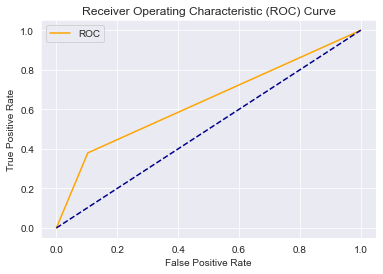

In [66]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Creating the pickle file

In [67]:
import pickle

In [68]:
filename ='final_ls_model.pickle'

In [69]:
pickle.dump(ls,open(filename,'wb'))

In [70]:
loaded_model = pickle.load(open(filename,'rb'))

In [71]:
loaded_model.score(x_test,y_test)

0.731413612565445